<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/Artigo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install alpha_vantage

In [31]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [32]:
# Configurar sua chave de API
chave_api = 'JFZ0ASX1UYOK101E'  # Substitua pela sua chave

In [33]:
# Inicializar o objeto TimeSeries
ts = TimeSeries(key=chave_api, output_format='pandas')  # Saída como DataFrame

In [34]:
# Buscar dados diários da PETR4 (B3)
dados, meta_dados = ts.get_daily(symbol='PETR4.SA', outputsize='compact')  # 'compact' (100 dias) ou 'full' (20+ anos)

In [35]:
# Mostrar os últimos 5 registros
print(dados.tail())

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-12-11    40.35    40.76   39.95     40.59  46900900.0
2024-12-10    40.30    40.43   40.11     40.19  21837600.0
2024-12-09    39.38    40.17   39.36     40.04  28548700.0
2024-12-06    39.64    39.70   38.96     39.03  31118500.0
2024-12-05    39.39    39.81   39.21     39.64  25214200.0


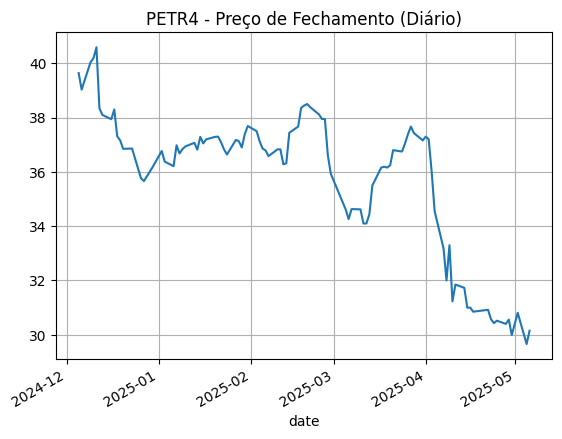

In [56]:
# Plotar preço de fechamento
dados['4. close'].plot(title='PETR4 - Preço de Fechamento (Diário)')
plt.grid()
plt.show()

In [69]:
from alpha_vantage.techindicators import TechIndicators

In [70]:

# Obter RSI (14 dias)
rsi_dados, rsi_meta = ti.get_rsi(symbol='PETR4.SA', interval='daily', time_period=14)

In [71]:
# 1. Buscar dados do RSI
ti = TechIndicators(key=chave_api, output_format='pandas')
ticker = 'PETR4.SA'  # Define o ticker aqui
rsi_dados, _ = ti.get_rsi(symbol=ticker, interval='daily', time_period=14)

# 2. Buscar dados de preço (fechamento)
ts = TimeSeries(key=chave_api, output_format='pandas')
dados_preco, _ = ts.get_daily(symbol=ticker, outputsize='compact')







In [72]:
import pandas as pd
# 3. Juntar RSI e Preço no mesmo DataFrame
dados = pd.DataFrame({
    'Preço': dados_preco['4. close'],
    'RSI': rsi_dados['RSI']
}).dropna()  # Remove linhas com valores faltantes



--- Preços nos Cruzamentos do RSI ---

Sobrevendido (RSI >= 30):
date
2025-03-07    34.63
2025-03-13    34.44
2025-04-09    33.30
2025-04-11    31.85
2025-04-17    30.85
Name: Preço, dtype: float64

Sobrecomprado (RSI <= 70):
date
2024-12-12    38.34
Name: Preço, dtype: float64


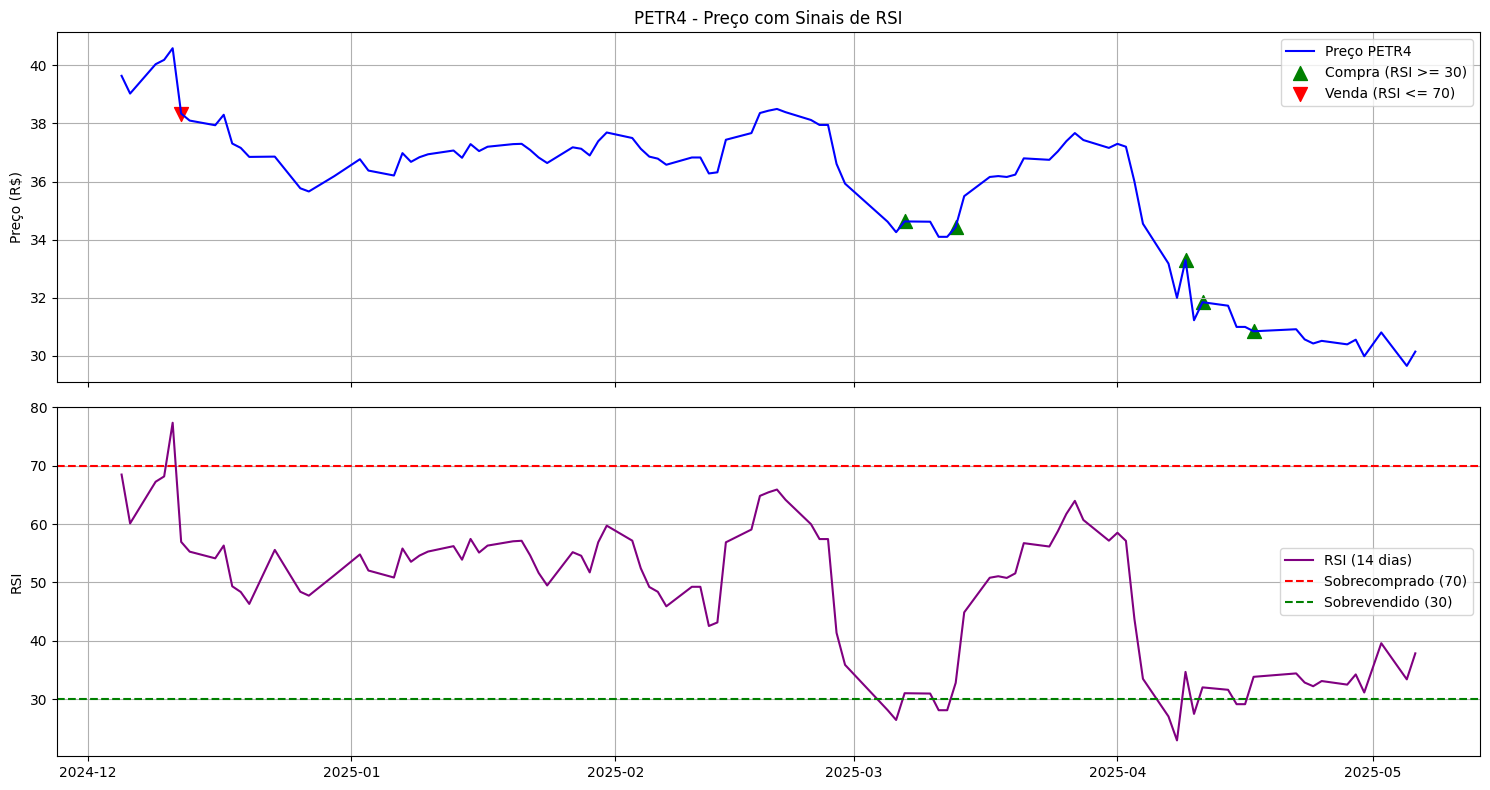

In [73]:
# 4. Identificar cruzamentos
cruzamentos_sobrevendido = (dados['RSI'].shift(1) < 30) & (dados['RSI'] >= 30)
cruzamentos_sobrecomprado = (dados['RSI'].shift(1) > 70) & (dados['RSI'] <= 70)

# 5. Extrair preços nos cruzamentos
precos_sobrevendido = dados[cruzamentos_sobrevendido]['Preço']
precos_sobrecomprado = dados[cruzamentos_sobrecomprado]['Preço']

print("--- Preços nos Cruzamentos do RSI ---")
print("\nSobrevendido (RSI >= 30):")
print(precos_sobrevendido)
print("\nSobrecomprado (RSI <= 70):")
print(precos_sobrecomprado)

# 6. Plotar gráfico com preços e RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Gráfico do Preço
ax1.plot(dados['Preço'], label='Preço PETR4', color='blue')
ax1.scatter(precos_sobrevendido.index, precos_sobrevendido, color='green', label='Compra (RSI >= 30)', marker='^', s=100)
ax1.scatter(precos_sobrecomprado.index, precos_sobrecomprado, color='red', label='Venda (RSI <= 70)', marker='v', s=100)
ax1.set_title('PETR4 - Preço com Sinais de RSI')
ax1.set_ylabel('Preço (R$)')
ax1.legend()
ax1.grid(True)

# Gráfico do RSI
ax2.plot(dados['RSI'], label='RSI (14 dias)', color='purple')
ax2.axhline(70, color='red', linestyle='--', label='Sobrecomprado (70)')
ax2.axhline(30, color='green', linestyle='--', label='Sobrevendido (30)')
ax2.set_ylabel('RSI')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()